Saving nba_traditional_stats_2024_2025.csv to nba_traditional_stats_2024_2025 (3).csv
Using file: nba_traditional_stats_2024_2025 (3).csv
Filtered to 312 player rows
Sample of Scoring Load table:


,Year,Season Type,PLAYER,TEAM,GP,MIN,PTS,PPG,TeamPTS,TeamPPG_proxy,ScoringLoadPct,ScoringLoad_PG,FGA,FG3A,FTA,EFF
0,2024-25,Regular Season,Shai Gilgeous-Alexander,OKC,76,2598,2484,32.684211,8865,13.722910,28.020305,238.172589,1656,435,669,2510
1,2024-25,Regular Season,Anthony Edwards,MIN,79,2871,2177,27.556962,8547,14.316583,25.470925,192.482817,1612,811,496,1907
2,2024-25,Regular Season,Nikola Jokić,DEN,70,2571,2071,29.585714,9004,16.311594,23.000888,181.378435,1364,331,451,2953
3,2024-25,Regular Season,Devin Booker,PHX,75,2795,1923,25.640000,8392,12.562874,22.914681,204.093422,1420,551,483,1803
4,2024-25,Regular Season,James Harden,LAC,79,2789,1802,22.810127,8091,13.242226,22.271660,172.252964,1295,668,578,1940
5,2024-25,Regular Season,LeBron James,LAL,70,2444,1710,24.428571,7781,13.461938,21.976610,181.464006,1270,396,331,1989
6,2024-25,Regular Season,Giannis Antetokounmpo,MIL,67,2289,2036,30.388060,9309,13.750369,21.871307,220.998135,1319,63,707,2400
7,2024-25,Regular Season,Stephen Curry,GSW,70,2252,1718,24.542857,7888,11.236467,21.779919,218.421472,1258,784,299,1645
8,2024-25,Regular Season,Jayson Tatum,BOS,72,2624,1932,26.833333,9120,13.797277,21.184211,194.482822,1465,728,440,2006
9,2024-25,Regular Season,Jalen Green,HOU,82,2697,1723,21.012195,8242,13.993209,20.905120,150.159948,1437,661,336,1385



Top by Scoring Load % (Totals-Based):


,Year,Season Type,PLAYER,TEAM,PTS,TeamPTS,ScoringLoadPct
0,2024-25,Regular Season,Shai Gilgeous-Alexander,OKC,2484,8865,28.020305
1,2024-25,Regular Season,Anthony Edwards,MIN,2177,8547,25.470925
2,2024-25,Regular Season,Nikola Jokić,DEN,2071,9004,23.000888
3,2024-25,Regular Season,Devin Booker,PHX,1923,8392,22.914681
4,2024-25,Regular Season,James Harden,LAC,1802,8091,22.271660
5,2024-25,Regular Season,LeBron James,LAL,1710,7781,21.976610
6,2024-25,Regular Season,Giannis Antetokounmpo,MIL,2036,9309,21.871307
7,2024-25,Regular Season,Stephen Curry,GSW,1718,7888,21.779919
8,2024-25,Regular Season,Jayson Tatum,BOS,1932,9120,21.184211
9,2024-25,Regular Season,Jalen Green,HOU,1723,8242,20.905120


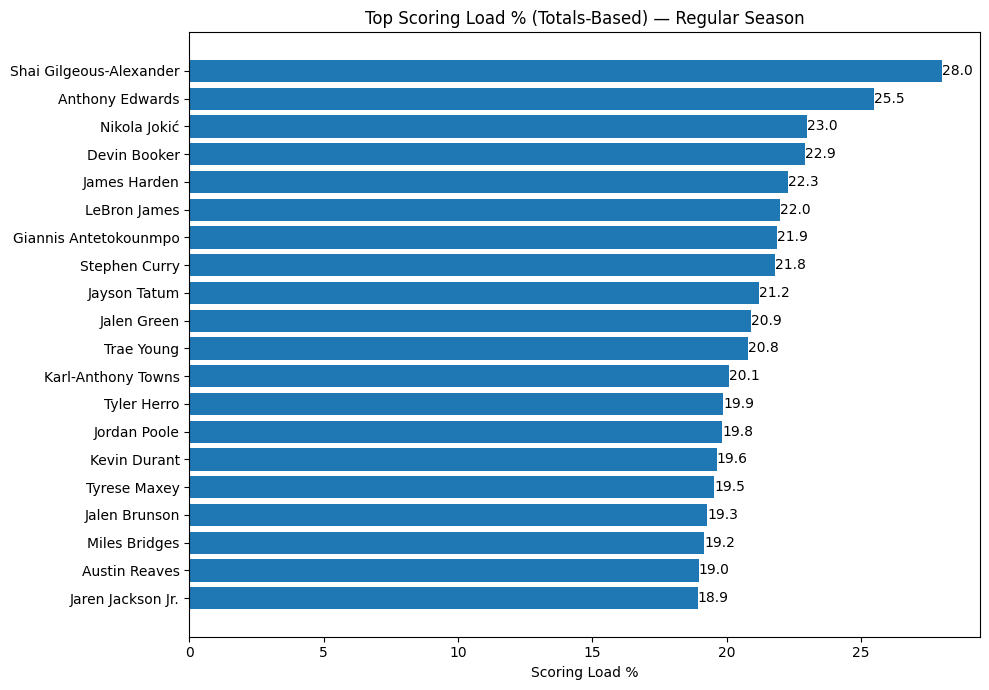

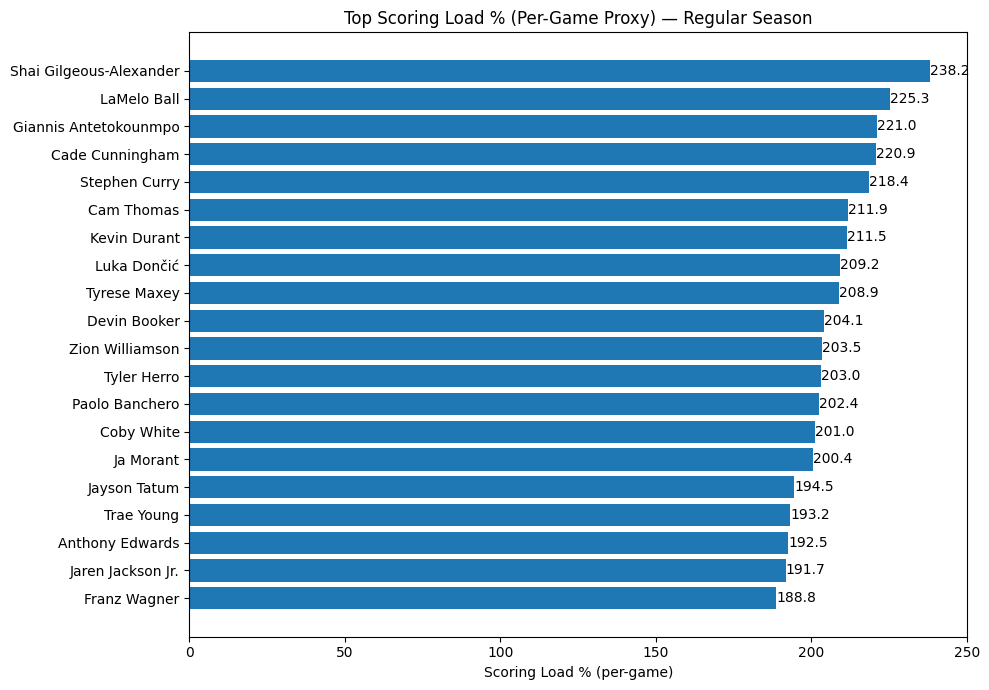

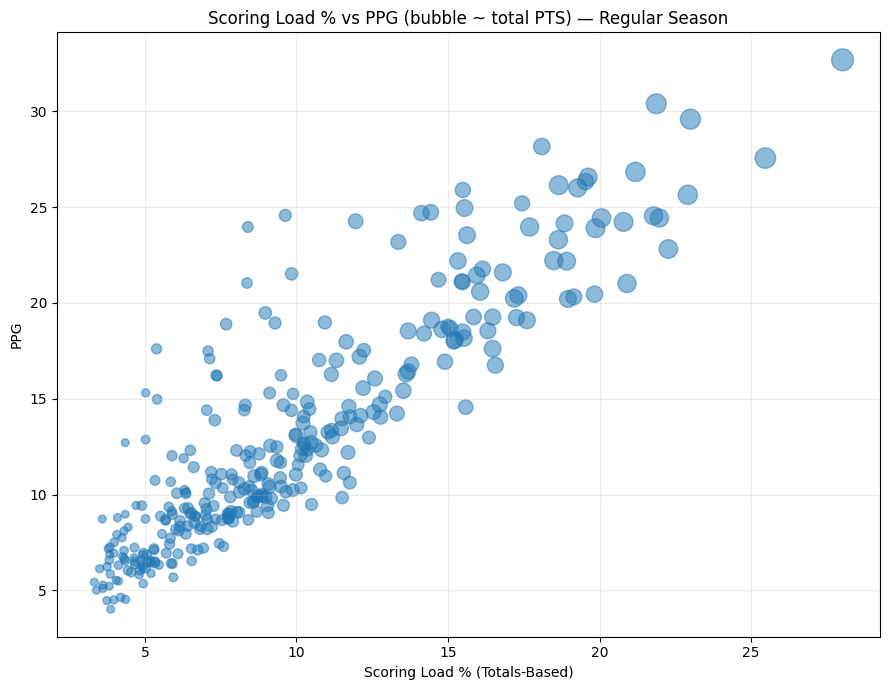


Saved:
- scoring_load_table.csv
- leaders_scoring_load_totals.csv
- leaders_scoring_load_pergame.csv
- top_scoring_load_totals.png
- top_scoring_load_pergame.png
- scatter_scoring_load_vs_ppg.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
# 🏀 Scoring Load % — Colab/Jupyter Ready
# ------------------------------------------------------------
# Uses ONLY your scraped columns:
# Year, Season Type, PLAYER_ID, RANK, PLAYER, TEAM_ID, TEAM, GP, MIN,
# FGM, FGA, FG_PCT, FG3M, FG3A, FG3_PCT, FTM, FTA, FT_PCT,
# OREB, DREB, REB, AST, STL, BLK, TOV, PF, PTS, EFF, AST_TOV, STL_TOV
# ------------------------------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)

# ================================
# 1) Load CSV (works in Colab or local)
# ================================
try:
    # Try Colab upload
    from google.colab import files  # noqa
    uploaded = files.upload()
    file_path = list(uploaded.keys())[0]
except Exception:
    # Fallback: local filename here
    file_path = "nba_traditional_stats_2024_2025.csv"   # <-- change if needed

print("Using file:", file_path)
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]

# Clean Season Type text if URL-encoded
if "Season Type" in df.columns:
    df["Season Type"] = df["Season Type"].astype(str).str.replace("%20", " ", regex=False)

# Ensure numeric for needed columns
num_cols = ["GP","MIN","PTS","FGA","FG3A","FTA","EFF"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Basic required columns
required = ["Year","Season Type","PLAYER","TEAM","GP","MIN","PTS"]
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

# Drop obviously incomplete rows
df = df.dropna(subset=required).copy()

# ================================
# 2) Parameters & Filters
# ================================
# Choose a season (or keep None to include all)
target_year = None                 # e.g., "2024-25" or None
target_season_type = "Regular Season"   # "Regular Season", "Playoffs", or None

# Minimum thresholds to avoid tiny samples
MIN_GP = 20
MIN_MINUTES = 300
MIN_POINTS = 300   # total points (tweak per your preference)

df_use = df.copy()
if target_year is not None:
    df_use = df_use[df_use["Year"] == target_year]
if target_season_type is not None:
    df_use = df_use[df_use["Season Type"].str.lower() == target_season_type.lower()]

df_use = df_use[(df_use["GP"] >= MIN_GP) & (df_use["MIN"] >= MIN_MINUTES) & (df_use["PTS"] >= MIN_POINTS)].copy()
print(f"Filtered to {len(df_use)} player rows")

# ================================
# 3) Team Totals & Scoring Load %
# ================================
# Team totals (by Year + Season Type + TEAM)
team_totals = (df_use.groupby(["Year","Season Type","TEAM"], as_index=False)
               .agg(TeamPTS=("PTS","sum"),
                    TeamGP=("GP","sum")))   # TeamGP is sum over players, used only for optional per-game variant

# Merge back to players
x = df_use.merge(team_totals, on=["Year","Season Type","TEAM"], how="left")

# Scoring Load % (totals-based)
x["ScoringLoad"] = np.where(x["TeamPTS"] > 0, x["PTS"] / x["TeamPTS"], np.nan)
x["ScoringLoadPct"] = x["ScoringLoad"] * 100.0

# Optional: Per-game variant (player PPG over team PPG estimate)
# (Note: TeamPPG via sum of player totals / sum of team games played by all players may not equal real team PPG,
# but it's a consistent, dataset-only proxy.)
x["PPG"] = np.where(x["GP"] > 0, x["PTS"] / x["GP"], np.nan)
x["TeamPPG_proxy"] = np.where(x["TeamGP"] > 0, x["TeamPTS"] / x["TeamGP"], np.nan)
x["ScoringLoad_PG"] = np.where(x["TeamPPG_proxy"] > 0, x["PPG"] / x["TeamPPG_proxy"], np.nan) * 100.0

# Output table
cols_out = ["Year","Season Type","PLAYER","TEAM","GP","MIN","PTS","PPG",
            "TeamPTS","TeamPPG_proxy","ScoringLoadPct","ScoringLoad_PG",
            "FGA","FG3A","FTA","EFF"]
scoring_load_tbl = (x[cols_out]
                    .sort_values(["Year","Season Type","ScoringLoadPct"], ascending=[True, True, False])
                    .reset_index(drop=True))

print("Sample of Scoring Load table:")
display(scoring_load_tbl.head(10))

# ================================
# 4) Leaderboards
# ================================
# Top N by Scoring Load %
TOPN = 20
leaders_total = (scoring_load_tbl
                 .sort_values("ScoringLoadPct", ascending=False)
                 .head(TOPN))

leaders_pg = (scoring_load_tbl
              .sort_values("ScoringLoad_PG", ascending=False)
              .head(TOPN))

print("\nTop by Scoring Load % (Totals-Based):")
display(leaders_total[["Year","Season Type","PLAYER","TEAM","PTS","TeamPTS","ScoringLoadPct"]])

# ================================
# 5) Plots
# ================================
def barh_plot(df_plot, value_col, title, xlabel, png_name):
    plot_df = df_plot.copy()
    plt.figure(figsize=(10, 7))
    plt.barh(plot_df["PLAYER"][::-1], plot_df[value_col][::-1])
    for i, v in enumerate(plot_df[value_col][::-1]):
        plt.text(v, i, f"{v:.1f}", va="center", ha="left")
    plt.title(title + (f" — {target_year}" if target_year else "") + (f" — {target_season_type}" if target_season_type else ""))
    plt.xlabel(xlabel)
    plt.tight_layout()
    plt.savefig(png_name, dpi=300)
    plt.show()

barh_plot(leaders_total, "ScoringLoadPct", "Top Scoring Load % (Totals-Based)", "Scoring Load %", "top_scoring_load_totals.png")
barh_plot(leaders_pg,    "ScoringLoad_PG", "Top Scoring Load % (Per-Game Proxy)", "Scoring Load % (per-game)", "top_scoring_load_pergame.png")

# Optional: scatter to compare Load% vs raw PPG
plt.figure(figsize=(9, 7))
plt.scatter(scoring_load_tbl["ScoringLoadPct"], scoring_load_tbl["PPG"], alpha=0.5, s=np.clip(scoring_load_tbl["PTS"]/10, 20, 600))
plt.xlabel("Scoring Load % (Totals-Based)")
plt.ylabel("PPG")
plt.title("Scoring Load % vs PPG (bubble ~ total PTS)" + (f" — {target_year}" if target_year else "") + (f" — {target_season_type}" if target_season_type else ""))
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.savefig("scatter_scoring_load_vs_ppg.png", dpi=300)
plt.show()

# ================================
# 6) Save CSVs
# ================================
scoring_load_tbl.to_csv("scoring_load_table.csv", index=False)
leaders_total.to_csv("leaders_scoring_load_totals.csv", index=False)
leaders_pg.to_csv("leaders_scoring_load_pergame.csv", index=False)

print("\nSaved:")
print("- scoring_load_table.csv")
print("- leaders_scoring_load_totals.csv")
print("- leaders_scoring_load_pergame.csv")
print("- top_scoring_load_totals.png")
print("- top_scoring_load_pergame.png")
print("- scatter_scoring_load_vs_ppg.png")

# Save into a folder + download a zip (Colab)
import os, zipfile
from google.colab import files

OUT = "outputs_scoring_load"
os.makedirs(OUT, exist_ok=True)

# move/overwrite files into OUT
import shutil
for fname in [
    "scoring_load_table.csv",
    "leaders_scoring_load_totals.csv",
    "leaders_scoring_load_pergame.csv",
    "top_scoring_load_totals.png",
    "top_scoring_load_pergame.png",
    "scatter_scoring_load_vs_ppg.png",
]:
    if os.path.exists(fname):
        shutil.move(fname, os.path.join(OUT, fname))

# zip them
zip_name = "scoring_load_outputs.zip"
with zipfile.ZipFile(zip_name, "w", zipfile.ZIP_DEFLATED) as z:
    for f in os.listdir(OUT):
        z.write(os.path.join(OUT, f), arcname=f)

# download
files.download(zip_name)